<a href="https://colab.research.google.com/github/durbin-164/TensorFlow-Basic-Work/blob/master/Linear_Regression_Raw_code_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install tensorflow==2.0.0-beta1
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.0.0-beta1


In [0]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [0]:
def makeDataset(ran,numberOfData):
  
  x = tf.linspace(0.0,ran,numberOfData)
  
  x = tf.random.shuffle(x)
  
  y = x*1.8+32.0
  
  return tf.reshape(x,[x.shape[0],1]),tf.reshape(y,[y.shape[0],1])
  
  

In [0]:
def makeDataset2():
  # generate random data-set
  np.random.seed(0)
  x = np.random.rand(100, 1)
  y = 2 + 3 * x + np.random.rand(100, 1)
  
  x = tf.cast(x, dtype = tf.float32)
  y = tf.cast(y, dtype = tf.float32)
  
  return tf.reshape(x, [x.shape[0],1]), tf.reshape(y,[y.shape[0],1])


(100, 1)
(100, 1)
tf.Tensor([0.71518934], shape=(1,), dtype=float32)


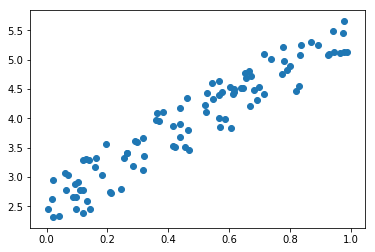

In [0]:
#X,y = makeDataset(100.0,tf.constant(50))
X,y = makeDataset2()

print(X.shape)
print(y.shape)

print(X[1])

plt.scatter(X,y)


In [0]:
def dataAgmentation(X):
  
  tmp = tf.cast(tf.fill(X.shape,1),dtype=tf.float32)
  
  return tf.concat([tmp,X], axis = 1)
  
  

In [0]:

agmentX= dataAgmentation(X)
print(agmentX[:5,:])

tf.Tensor(
[[  1.        0.     ]
 [  1.      204.08163]
 [  1.      408.16327]
 [  1.      612.2449 ]
 [  1.      816.32654]], shape=(5, 2), dtype=float32)


In [0]:
def predict(X,w):
  
  return tf.matmul(X,w)

In [0]:
X_t = tf.constant([[1,10],[1,20],[1,30]], dtype = tf.float32)
w_t = tf.constant([[1],[10]] , dtype = tf.float32)
print(X_t.shape)
print(w_t.shape)
print(predict(X_t,w_t))

(3, 2)
(2, 1)
tf.Tensor(
[[101.]
 [201.]
 [301.]], shape=(3, 1), dtype=float32)


In [0]:
def cost(y,y_pred):
  c = tf.square(y-y_pred)
  c = tf.reduce_sum(c)
  
  return (1/(2*y.shape[0]))*c

In [0]:
y_t = tf.constant([[10],[20],[30]], dtype = tf.float32)
y_pred_t = tf.constant([[10],[10],[30]], dtype = tf.float32)

print(cost(y_t,y_pred_t))

tf.Tensor(16.666668, shape=(), dtype=float32)


In [0]:
def del_cost(X,y,y_pred):
  
  c = tf.matmul(tf.transpose(X),(y_pred-y))
  
  c = (1/y.shape[0])*c
  
  return c
  
  

In [0]:
X_t = tf.constant([[1,10],[1,20],[1,30]], dtype = tf.float32)
y_t = tf.constant([[8],[10],[14]], dtype = tf.float32)
y_pred_t = tf.constant([[10],[6],[20]], dtype = tf.float32)

print(del_cost(X_t, y_t,y_pred_t))

tf.Tensor(
[[ 1.3333334]
 [40.       ]], shape=(2, 1), dtype=float32)


In [0]:
def train(X,y, w, alpha=0.001, iteration=50):
  
  all_cost = []
  
  
  
  for i in range(iteration):
    
    y_pred = predict(X,w)
    c = cost(y,y_pred)
    all_cost.append(c)
    
    #Apply Gradinet Desent.
    del_J = del_cost(X,y,y_pred)
    
    #print(tf.scalar_mul(alpha,del_J))
    w = w - (tf.scalar_mul(alpha,del_J))
    #weight update done.
    if(i%1000==0):
      print('Iteration = {} :: Cost = {}'.format(i,c))
      #print(w)
      plt.scatter(X[:,1],y_pred)
      
  
  return w, all_cost
    
    

In [0]:
X_t = tf.constant([[1,10],[1,20],[1,30]], dtype = tf.float32)
y_t = tf.constant([[8],[10],[14]], dtype = tf.float32)
w_t = tf.constant([[0],[0]] , dtype = tf.float32)


w, all_cost = train(X_t, y_t,w_t,0.001, 10)


Iteration = 0 :: Cost = 60.0


In [0]:
def test(X_test, y_test,w):
  
  y_pred = predict(X_test, w)
  
  for i in range(min(y_test.shape[0],10)):
    print('X : {} ->Predict: {} -> Original : {}'.format(X_test[i],y_pred[i],y_test[i]))
    
  
  

In [0]:
def main():
  
  #X,y = makeDataset(1000.00,1000)
  X,y = makeDataset2()
  
  #X,y = tf.random.shuffle([X,y],seed=100)
  
  plt.scatter(X,y)

  
  X = dataAgmentation(X)
  
  pk = int(.9*X.shape[0])
  
  print(pk)
  
  
  X_train = X[:pk,:]
  X_test = X[pk:,:]
  
  y_train = y[:pk,:]
  y_test = y[pk:,:]
  
  print(X_train.shape)
  print(X_test.shape)
  
  
  print(X_train[1],y_train[1])
  
  #w = tf.random.uniform([2,1])
  w = tf.constant([[0],[0]] , dtype = tf.float32)
  
  print(w)
  
  w, all_cost = train(X_train,y_train,w,0.01, 10000)
  #test(X_test,y_test, w)
  pred = predict(X,w)
  pred = tf.reshape(pred, [pred.shape[0],1])
  print(pred.shape)
  print(X.shape)
  plt.scatter(X[:,1], pred )
  plt.show()
  
  return w , X_test, y_test, all_cost
  
  
  
  
  
  

90
(90, 2)
(10, 2)
tf.Tensor([1.         0.71518934], shape=(2,), dtype=float32) tf.Tensor([4.415576], shape=(1,), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)
Iteration = 0 :: Cost = 8.361091613769531
Iteration = 1000 :: Cost = 0.05460027605295181
Iteration = 2000 :: Cost = 0.04201754182577133
Iteration = 3000 :: Cost = 0.03863083943724632
Iteration = 4000 :: Cost = 0.03771929442882538
Iteration = 5000 :: Cost = 0.03747393935918808
Iteration = 6000 :: Cost = 0.03740790858864784
Iteration = 7000 :: Cost = 0.03739013895392418
Iteration = 8000 :: Cost = 0.037385351955890656
Iteration = 9000 :: Cost = 0.037384066730737686
(100, 1)
(100, 2)


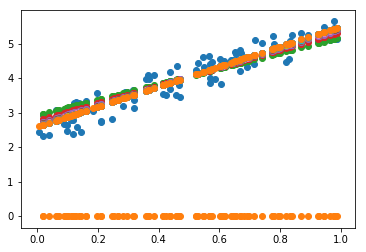

tf.Tensor(
[[2.58687 ]
 [2.909318]], shape=(2, 1), dtype=float32)


In [0]:
w, X_test, y_test, all_cost = main()

print(w)

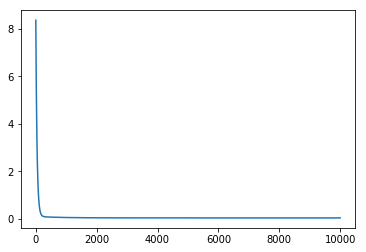

In [0]:
plt.plot(range(len(all_cost)),all_cost)

In [0]:
test(X_test,y_test, w)

X : [1.         0.31856894] ->Predict: [3.5136883] -> Original : [3.3539279]
X : [1.        0.6674104] ->Predict: [4.5285788] -> Original : [4.2120748]
X : [1.         0.13179787] ->Predict: [2.9703119] -> Original : [2.5815866]
X : [1.        0.7163272] ->Predict: [4.6708937] -> Original : [5.093354]
X : [1.        0.2894061] ->Predict: [3.4288442] -> Original : [3.607769]
X : [1.         0.18319136] ->Predict: [3.1198318] -> Original : [3.0400329]
X : [1.        0.5865129] ->Predict: [4.2932224] -> Original : [3.9869535]
X : [1.         0.02010755] ->Predict: [2.6453693] -> Original : [2.3146791]
X : [1.         0.82894003] ->Predict: [4.99852] -> Original : [4.5448494]
X : [1.         0.00469548] ->Predict: [2.6005306] -> Original : [2.448503]
